In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  

In [2]:
#Load dataset
zoo = pd.read_csv('zoo.csv')
zoo.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal


In [3]:
#Separe training dataset from the target attribute
#Eliminate the first and last attributes
X = zoo.iloc[:, 1:-1].values  
#Take the last attribute as a target
y = zoo.iloc[:, 17].values  
print(X.shape)

(101, 16)


In [4]:
#create training and testing datasets. 30% for tests selected by random
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(70, 16) (70,)
(31, 16) (31,)


In [5]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['amphibian' 'bird' 'fish' 'insect' 'invertebrate' 'mammal' 'reptile']
 [2 9 11 5 10 29 4]]


In [6]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['amphibian' 'bird' 'fish' 'insect' 'mammal' 'reptile']
 [2 11 2 3 12 1]]


In [16]:
# neigh = KNeighborsClassifier(n_neighbors=3,weights='distance')
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
#Store the predictions
from sklearn.metrics import accuracy_score
predictions_train = neigh.predict(X_train)
#Compute train accuracy
accuracy_score(y_train,predictions_train)*100

97.14285714285714

In [9]:
from sklearn.metrics import confusion_matrix
#Gera a matriz de confusão do treino
confusion_matrix(y_train,predictions_train)

array([[ 2,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  4]])

<Axes: >

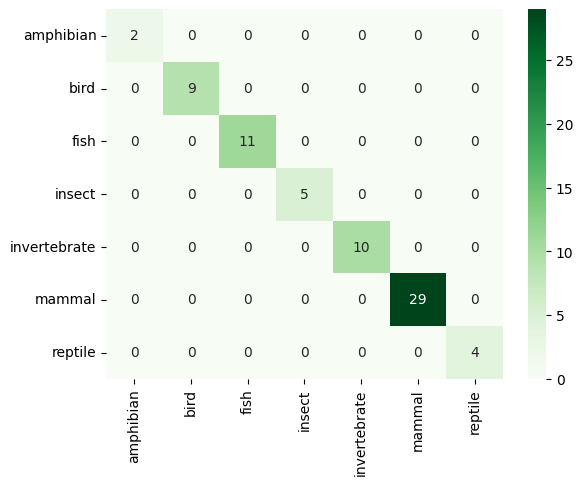

In [10]:
#Gera a matriz de confusão do treino na visualização de HeatMMap
cf = confusion_matrix(y_train,predictions_train)
lbl1=['amphibian', 'bird', 'fish', 'insect', 'invertebrate', 'mammal', 'reptile']
lbl2 = ['amphibian', 'bird', 'fish', 'insect', 'invertebrate', 'mammal', 'reptile']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

In [11]:
#Compute test accuracy
predictions = neigh.predict(X_test)
accuracy_score(y_test,predictions)*100

96.7741935483871

In [12]:
#Confusion matrix for test dataset
confusion_matrix(y_test,predictions)

array([[ 2,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 1,  0,  0,  0,  0,  0]])

<Axes: >

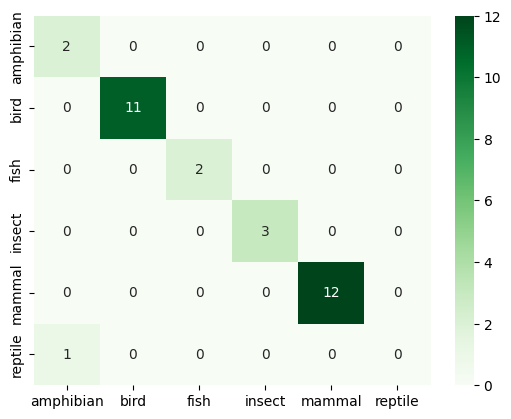

In [13]:
#Gera a matriz de confusão para o conunto de teste na visualização de HeatMMap
cf = confusion_matrix(y_test,predictions)
lbl1=['amphibian', 'bird', 'fish', 'insect', 'mammal', 'reptile']
lbl2 = ['amphibian', 'bird', 'fish', 'insect', 'mammal', 'reptile']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)